In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
ratings.pop('timestamp')

0         1260759144
1         1260759179
2         1260759182
3         1260759185
4         1260759205
             ...    
99999     1065579370
100000    1065149201
100001    1070940363
100002    1070979663
100003    1074784724
Name: timestamp, Length: 100004, dtype: int64

In [5]:
ratings

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [6]:
dataset = ratings.merge(movies,on='movieId',how='left')
dataset.head()

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
1,1,1029,3.0,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,Sleepers (1996),Thriller
3,1,1129,2.0,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100004 entries, 0 to 100003
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
 3   title    100004 non-null  object 
 4   genres   100004 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [8]:
rating_count = pd.DataFrame(dataset.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'number_of_rating'}))
rating_count.head()

,title,number_of_rating
0,"""Great Performances"" Cats (1998)",2
1,$9.99 (2008),3
2,'Hellboy': The Seeds of Creation (2004),1
3,'Neath the Arizona Skies (1934),1
4,'Round Midnight (1986),2


In [9]:
rating_count.sort_values('number_of_rating',ascending=False)

,title,number_of_rating
2933,Forrest Gump (1994),341
6391,Pulp Fiction (1994),324
7084,"Shawshank Redemption, The (1994)",311
7166,"Silence of the Lambs, The (1991)",304
7488,Star Wars: Episode IV - A New Hope (1977),291
...,...,...
6694,Robin Williams: Weapons of Self Destruction (2...,1
3282,"Good German, The (2006)",1
3281,"Good Earth, The (1937)",1
6700,Robot Overlords (2014),1


In [10]:
rating_count[rating_count['number_of_rating']>100].head(2)

,title,number_of_rating
62,2001: A Space Odyssey (1968),123
187,Ace Ventura: Pet Detective (1994),175


In [11]:
dataset_1 = dataset.merge(rating_count,left_on='title',right_on='title',how='left')
dataset_1.head()

,userId,movieId,rating,title,genres,number_of_rating
0,1,31,2.5,Dangerous Minds (1995),Drama,42
1,1,1029,3.0,Dumbo (1941),Animation|Children|Drama|Musical,42
2,1,1061,3.0,Sleepers (1996),Thriller,33
3,1,1129,2.0,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,48
4,1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,46


In [12]:
pd.DataFrame(dataset_1['number_of_rating'].describe())

,number_of_rating
count,100004.000000
mean,63.465161
std,67.157569
min,1.000000
25%,14.000000
50%,40.000000
75%,90.000000
max,341.000000


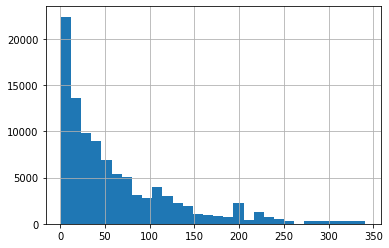

In [13]:
dataset_1['number_of_rating'].hist(bins=30)

In [14]:
threshold = 50
dataset_2 = dataset_1.query('number_of_rating >= @threshold')
dataset_2.head()

,userId,movieId,rating,title,genres,number_of_rating
8,1,1339,3.5,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
16,1,2294,2.0,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,53
19,1,3671,3.0,Blazing Saddles (1974),Comedy|Western,62
20,2,10,4.0,GoldenEye (1995),Action|Adventure|Thriller,122
21,2,17,5.0,Sense and Sensibility (1995),Drama|Romance,86


In [15]:
dataset_2['number_of_rating'].describe()

count    43083.000000
mean       121.332660
std         65.715661
min         50.000000
25%         70.000000
50%        104.000000
75%        151.000000
max        341.000000
Name: number_of_rating, dtype: float64

In [16]:
dataset_2.shape

(43083, 6)

In [17]:
pivot_table = dataset_2.pivot_table(index='title',columns='userId',values='rating').fillna(0)
pivot_table.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Days Later (2002),0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from scipy.sparse import csr_matrix

dataset_matrix = csr_matrix(pivot_table.values)

from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(dataset_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [31]:
pivot_table.shape[0]

453

In [26]:
dataset_matrix.shape

(453, 670)

In [52]:
query_index = np.random.choice(pivot_table.shape[0])
query_index,
dist, indices = model.kneighbors(pivot_table.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [54]:
pivot_table.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Days Later (2002),0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"40-Year-Old Virgin, The (2005)",0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.I. Artificial Intelligence (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
About a Boy (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0
"Abyss, The (1989)",0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
query_index = np.random.choice(pivot_table.shape[0])
query_index
dist, indices = model.kneighbors(pivot_table.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)
for i in range(0,len(dist.flatten())):
    if i == 0:
        print('Recommendation for {}:\n'.format(pivot_table.index[query_index]))
    else:
        print('{}: {}'.format(i,pivot_table.index[indices.flatten()[i]]))

Recommendation for Almost Famous (2000):

1: Royal Tenenbaums, The (2001)
2: High Fidelity (2000)
3: Erin Brockovich (2000)
4: O Brother, Where Art Thou? (2000)


In [101]:
new = pivot_table.reset_index()
new.head()

userId,title,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12 Angry Men (1957),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28 Days Later (2002),0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
type(pivot_table)

pandas.core.frame.DataFrame

In [156]:
# new['title'].index['12 Angry Men (1957)']
int(new[new['title']=='2001: A Space Odyssey (1968)'].index.values)

2

In [160]:
def recommed(movie_name):
#     query_index = np.random.choice(pivot_table.shape[0])
    query_index = int(new[new['title']==movie_name].index.values)
    query_index
    dist, indices = model.kneighbors(pivot_table.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)
    for i in range(0,len(dist.flatten())):
        if i == 0:
            print('Recommendation for {}:\n'.format(pivot_table.index[query_index]))
        else:
            print('{}: {}'.format(i,pivot_table.index[indices.flatten()[i]]))

In [164]:
movie_name = input('Enter movie name:')
# movie_name = '2001: A Space Odyssey (1968)'
recommed(movie_name)

Enter movie name:Starwars


TypeError: only size-1 arrays can be converted to Python scalars